## 1. Постановка задачи

<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [2]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [3]:
# ваш код здесь
df = taxi_data.copy()
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
oldest_date = df['pickup_datetime'].dt.date.min()
newest_date = df['pickup_datetime'].dt.date.max()

print(f'Временные рамки данных: {oldest_date} - {newest_date}.')

# Print date range in days
days = (newest_date - oldest_date).days

print(f'Время наблюдения: {days} дней.')

Временные рамки данных: 2016-01-01 - 2016-06-30.
Время наблюдения: 181 дней.


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [4]:
# ваш код здесь
nan_count = df.isna().sum().sum()
print(f'Найдено пропусков (NAN): {nan_count} штук.')

Найдено пропусков (NAN): 0 штук.


### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [5]:
# ваш код здесь
count = df['vendor_id'].nunique()
print(f'a) Найдено уникальных таксопарков: {count} штук.')

maxp_count = df['passenger_count'].max()
print(f'б) Максимальное количество пассажиров: {maxp_count} человек.')

trip_time_median =  round(df['trip_duration'].median())
trip_time_mean =  round(df['trip_duration'].mean()) 
print(f'в) Средняя продолжительность поездки: {trip_time_mean} секунд, медианная {trip_time_median} секунд.')

trip_time_min =  round(df['trip_duration'].min()) 
trip_time_max =  round(df['trip_duration'].max()) 
print(f'г) Максимальная/минимальная продолжительности поездки: {trip_time_min} / {trip_time_max}  секунд.')

a) Найдено уникальных таксопарков: 2 штук.
б) Максимальное количество пассажиров: 9 человек.
в) Средняя продолжительность поездки: 959 секунд, медианная 662 секунд.
г) Максимальная/минимальная продолжительности поездки: 1 / 3526282  секунд.


Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [6]:
# ваш код здесь

def add_datetime_features(d):
    """
    Add date, time, week features to the dataframe.
    :param d: dataframe with taxi data
    :return: dataframe with added features
    """
    d['pickup_date'] = d['pickup_datetime'].dt.date
    d['pickup_hour'] = d['pickup_datetime'].dt.hour
    #d['pickup_day_of_week'] = d['pickup_datetime'].dt.day_name()
    d['pickup_day_of_week'] = d['pickup_datetime'].dt.day_of_week
    return d

df = add_datetime_features(df) 

In [7]:
#trips_per_saturday = len(df[df['pickup_day_of_week'] == 'Saturday'])
trips_per_saturday = len(df[df['pickup_day_of_week'] == 5])
print(f'а) По субботам было совершено {trips_per_saturday} поездок.') 

trips_per_day = round(len(df)/ df['pickup_date'].nunique())
print(f'б) В среднем в день совершено {trips_per_day} поездок.') 

а) По субботам было совершено 220868 поездок.
б) В среднем в день совершено 8015 поездок.


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [8]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

# ваш код здесь
def add_holiday_features(d, h):
    """
    Add holiday features to the dataframe.
    :param d: dataframe with taxi data
    :return: dataframe with added features
    """
    hdates = pd.to_datetime(h['date'], format='%Y-%m-%d').dt.date
    d['pickup_holiday'] = 0
    d.loc[d['pickup_date'].isin(hdates),'pickup_holiday'] = 1
    return d
    
     
df = add_holiday_features(df, holiday_data)

holiday_trip_median =round(df.loc[df['pickup_holiday'] == 1,'trip_duration'].median())

print(f'Медианная длительность поездки на такси в праздничные дни: {holiday_trip_median} секунд.')

Медианная длительность поездки на такси в праздничные дни: 585 секунд.


### Задание 2.6
Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [9]:
osrm_data = pd.read_csv('data/osrm_data_train.csv', usecols=['id', 'total_distance', 'total_travel_time', 'number_of_steps'])
osrm_data

,id,total_distance,total_travel_time,number_of_steps
0,id2875421,2009.1,164.9,5
1,id2377394,2513.2,332.0,6
2,id3504673,1779.4,235.8,4
3,id2181028,1614.9,140.1,5
4,id0801584,1393.5,189.4,5
...,...,...,...,...
1458638,id2976426,28051.1,1462.5,13
1458639,id1440046,29616.3,1643.2,16
1458640,id1607338,25615.0,1765.1,30
1458641,id2071901,20284.1,1074.3,14


In [10]:
# ваш код здесь
def add_osrm_features(d, osrm):
    """
    Add OSRM features to the dataframe
    :param d: dataframe with taxi data
    :param osrm: dataframe with OSRM data
    :return: dataframe with added features
    """
    d = d.merge(osrm, on='id', how='left')
    return d
        

df = add_osrm_features(df, osrm_data)

In [11]:
mask = ~df['total_distance'].isna() & ~df['total_travel_time'].isna() & ~df['number_of_steps'].isna()
df_osrm_clean = df[mask]
      
t_data = df_osrm_clean['trip_duration'].median() 
t_osrm = df_osrm_clean['total_travel_time'].median()

print(f'Медианная длительность поездки по данным такси: {t_data} секунд.');
print(f'Медианная длительность поездки по данным OSRM: {t_osrm} секунд.');
print(f'Разница {t_data - t_osrm} секунд.');

bad_rows = df[~mask].shape[0]
print(f'Количество строк, содержащих неполные данные: {bad_rows}.');

Медианная длительность поездки по данным такси: 662.0 секунд.
Медианная длительность поездки по данным OSRM: 289.5 секунд.
Разница 372.5 секунд.
Количество строк, содержащих неполные данные: 1.


In [12]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [13]:
# ваш код здесь
def add_geographical_features(d):
    """
    Add haversine_distance, directions features to the dataframe.
    :param d: dataframe with taxi data
    :return: dataframe with added features
    """
    d['haversine_distance'] = get_haversine_distance( d['pickup_latitude'], d['pickup_longitude'], d['dropoff_latitude'], d['dropoff_longitude'])
    d['direction'] = get_angle_direction( d['pickup_latitude'], d['pickup_longitude'], d['dropoff_latitude'], d['dropoff_longitude'])
    return d

df = add_geographical_features(df)
hav_dist = df['haversine_distance'].median()
print(f'Медианное расстояние Хаверсина поездок: {round(hav_dist,2)} км.');

Медианное расстояние Хаверсина поездок: 2.09 км.


### Задание 2.8.
Реализуйте функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?


In [14]:
# Cоздаем обучающую выборку из географических координат всех точек.
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))

# Обучаем алгоритм кластеризации.
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
#kmeans.n_init = 10
kmeans.fit(coords)

# ваш код здесь
def add_cluster_features(d, algo):
    """
    Add clasterisation feature to the dataframe.
    :param d: dataframe with taxi data
    :algo: trained model 
    :return: dataframe with added feature
    """
    d['geo_cluster'] = algo.predict(
        np.hstack((d[['pickup_latitude', 'pickup_longitude']],
                   d[['dropoff_latitude', 'dropoff_longitude']]))
    )
    return d

df = add_cluster_features(df, kmeans)
trips_in_smallest_cluster = df['geo_cluster'].value_counts().idxmin()      
print(f'Количество поездок в наименьшем кластере {trips_in_smallest_cluster} шт.');

/home/igor/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Количество поездок в наименьшем кластере 2 шт.


### Задание 2.9.
Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [15]:
weather_data = pd.read_csv('data/weather_data.csv')

# ваш код здесь
def add_weather_features(d, weather):
    d = d.merge(weather, how='left', on=['pickup_date', 'pickup_hour'])
    return d

mod_weather_data = weather_data
mod_weather_data['pickup_date'] = pd.to_datetime(mod_weather_data['time'],format='%Y-%m-%d %H:%M:%S').dt.date
mod_weather_data['pickup_hour'] = pd.to_datetime(mod_weather_data['time'],format='%Y-%m-%d %H:%M:%S').dt.hour

mod_weather_data = mod_weather_data #.drop(columns=['date', 'hour'])

df = add_weather_features(df, mod_weather_data)
snow_trips = df[df['events'] == 'Snow']['id'].count()
print(f'Количество поездок в снегопад: {snow_trips}.')

rows_with_nans_in_weather_data = df[df[['temperature']].isna().any(axis=1)]
lost_weather = rows_with_nans_in_weather_data.shape[0] / df.shape[0] * 100
print(f'Процент пропусков погодных условий: {round(lost_weather, 2)}%.')

Количество поездок в снегопад: 13126.
Процент пропусков погодных условий: 0.82%.


In [16]:
# ваш код здесь
def fill_null_weather_data(d):
    """
    Fill empty values of whether features by median.
    :param d: dataframe with taxi data
    :return: dataframe with inserted median values
    """
    for col in ['temperature', 'visibility', 'wind speed', 'precip']:
      d[col] = d[col].fillna(
      d.groupby('pickup_date')[col].transform('median'))
     
      d['events'] = d['events'].fillna('None')
    
    for col in ['total_distance', 'total_travel_time', 'number_of_steps']:
      d[col] = d[col].fillna(d[col].median())
    
    return d    

df = fill_null_weather_data(df)

temprerature_mediana = df['temperature'].median()
print(f'Медиана в столбце "temperature" после заполнения пропусков: {temprerature_mediana}')

Медиана в столбце "temperature" после заполнения пропусков: 11.1


### Задание 2.10.
Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


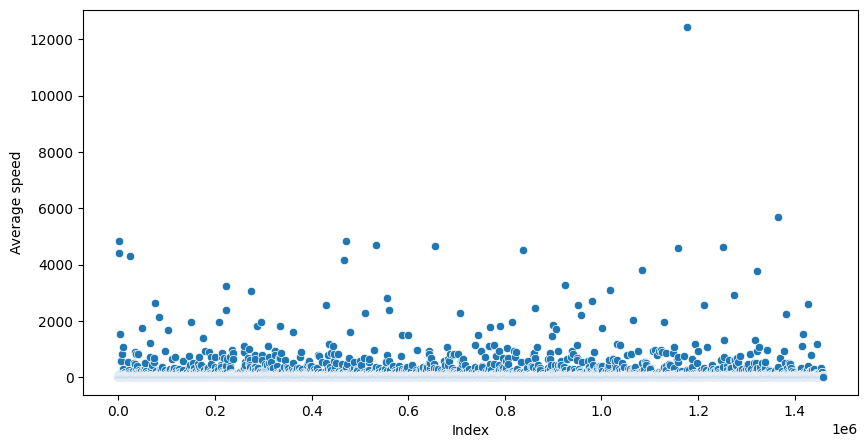

In [17]:
#avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
avg_speed = df['total_distance'] / df['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed');

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [18]:
# ваш код здесь
long_trips_mask = df['trip_duration'] > 24*3600 
print(f'Количество необычно долгих поездок: {df[long_trips_mask].shape[0]}')
df = df[~long_trips_mask]

avg_speed = df['total_distance'] / df['trip_duration'] * 3.6
high_speed_mask = avg_speed > 300
print(f'Количество необычно быстрых поездок: { df[high_speed_mask].shape[0]}')
df = df[~high_speed_mask]

Количество необычно долгих поездок: 4
Количество необычно быстрых поездок: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [19]:
#taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)
df['trip_duration_log'] = np.log(df['trip_duration'] + 1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

Выполним проверку гиптоез:
  H0: распределение нормальное.
  H1: распределение не нормальное.
Результат оценки:
Statistics=%.2f, p=%.2f (138350.16605405, 0.0)
Не похоже на гауссиану (отвергаем H0)


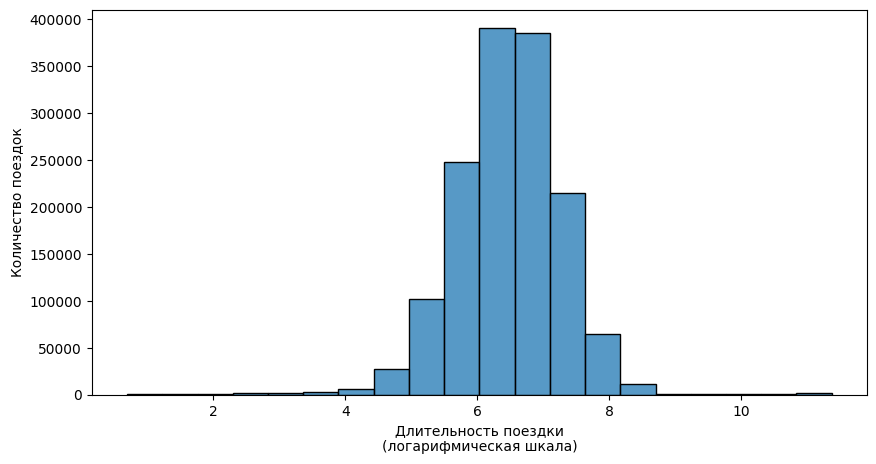

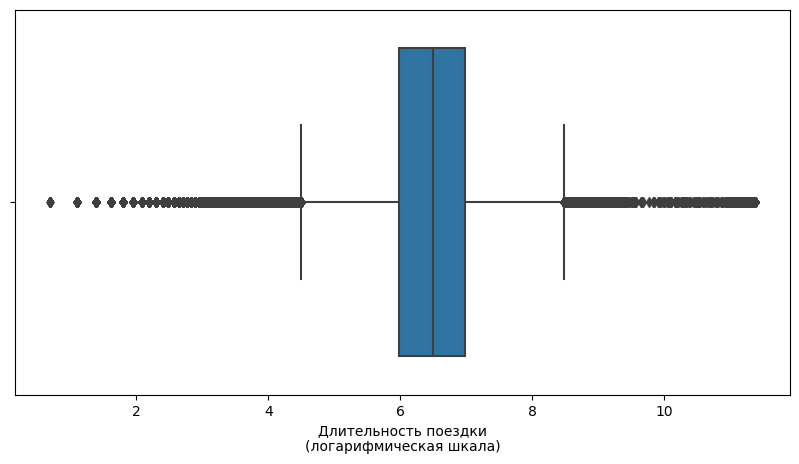

In [20]:
# ваш код здесь

from scipy.stats import normaltest

# Гистограмма
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(df['trip_duration_log'], bins=20, kde=False, ax=ax)
ax.set_xlabel('Длительность поездки\n(логарифмическая шкала)')
ax.set_ylabel('Количество поездок');

# Коробчатая диаграмма
fig, ax = plt.subplots(figsize=(10, 5))
sns.boxplot(x='trip_duration_log', data=df, ax=ax)
ax.set_xlabel('Длительность поездки\n(логарифмическая шкала)');

# Провека гипотезы о нормальности распределения с помощью теста Д’Агостино при уровне значимости alpha=0.05
print('Выполним проверку гиптоез:')
print('  H0: распределение нормальное.')
print('  H1: распределение не нормальное.')
stat, p = normaltest(df['trip_duration_log'])
print('Результат оценки:\nStatistics=%.2f, p=%.2f',(stat, p))
alpha = 0.05
if p > alpha:
    print('Распределение нормальное (принимаем гипотезу H0)')
else:
    print('Не похоже на гауссиану (отвергаем H0)')

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

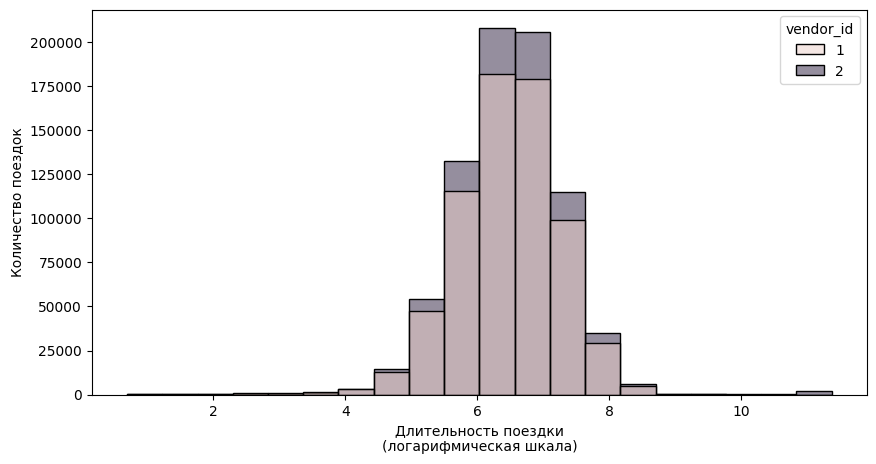

In [21]:
# ваш код здесь
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='trip_duration_log', data=df, hue='vendor_id', bins=20, kde=False, ax=ax)
ax.set_xlabel('Длительность поездки\n(логарифмическая шкала)')
ax.set_ylabel('Количество поездок');

Распределения похожи друг на друга. Можно предположить, что между таксопарками нет разделения зон влияния, возможно в таксопарке 2 работает больше автомобилей чем в таксопарке 1. Признак vendor_id не влияет на длительность поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

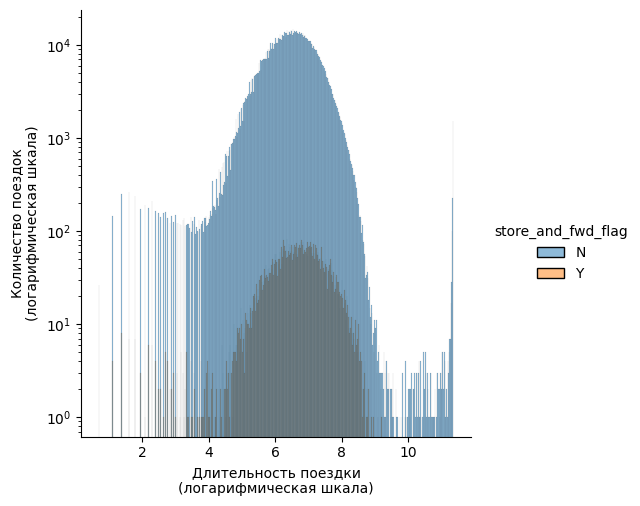

In [22]:
# ваш код здесь
ax = sns.displot(data=df, x='trip_duration_log', hue='store_and_fwd_flag', kind='hist', fill=True)
ax.set(xlabel='Длительность поездки\n(логарифмическая шкала)', ylabel='Количество поездок\n(логарифмическая шкала)')
plt.yscale('log')

Распределения отличаются. Распределение, соответствующее установленному флагу, имеет максимум сдвинутый вправо, т.е. в область более продолжительных поездок. Признак store_and_fwd_flag имеет значение при определении длительности поездки.

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

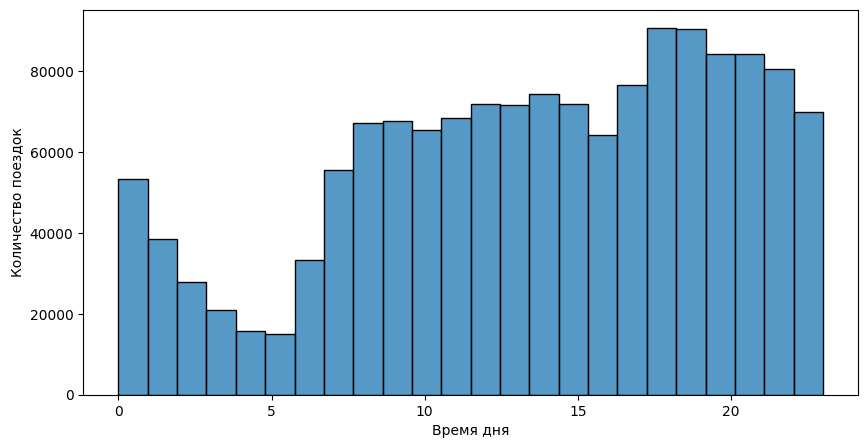

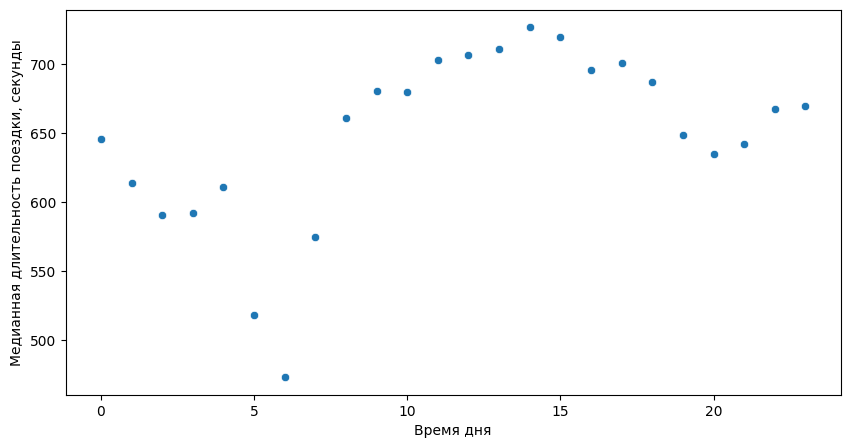

In [23]:
# ваш код здесь

# Распределение количества поездок в зависимости от часа дня.
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='pickup_hour', data=df, bins=24, kde=False, ax=ax)
ax.set_xlabel('Время дня')
ax.set_ylabel('Количество поездок'); 

# Динамика медианной длительности поездок в течение дня.
median_trip_time = df[['pickup_hour','trip_duration']].groupby('pickup_hour').median()
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='pickup_hour', y='trip_duration', data=median_trip_time, ax=ax)
ax.set_xlabel('Время дня')
ax.set_ylabel('Медианная длительность поездки, секунды');

Такси реже всего заказывают в 5 часов утра. Пик медианной длительности поездок наблюдается в 14 часов.

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


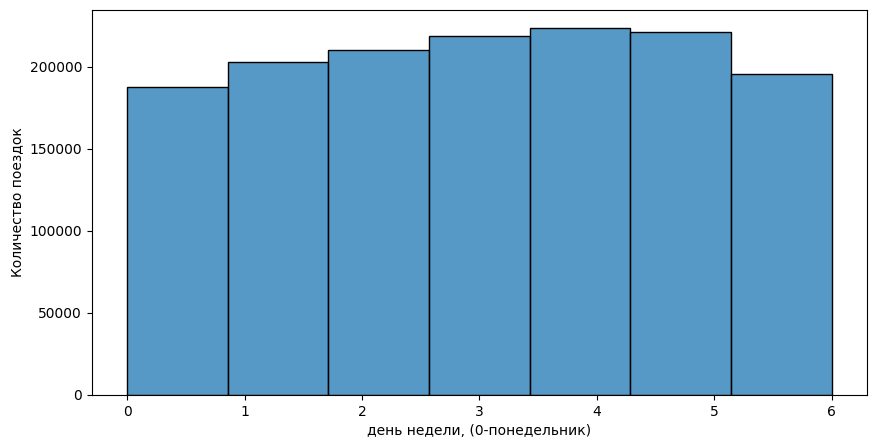

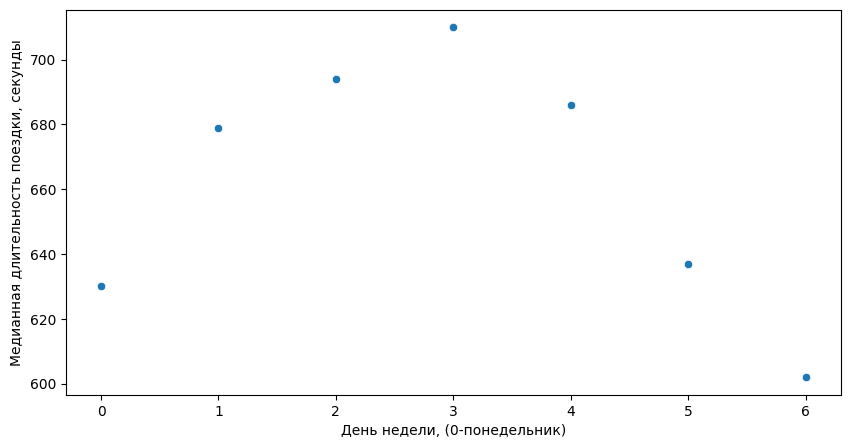

In [24]:
# ваш код здесь

# Распределение количества поездок в зависимости от дня недели.
fig, ax = plt.subplots(figsize=(10, 5))
sns.histplot(x='pickup_day_of_week', data=df, bins=7, kde=False, ax=ax)
ax.set_xlabel('день недели, (0-понедельник)')
ax.set_ylabel('Количество поездок'); 

# Динамика медианной длительности поездок в течение дня.
median_trip_time = df[['pickup_day_of_week','trip_duration']].groupby('pickup_day_of_week').median()
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x='pickup_day_of_week', y='trip_duration', data=median_trip_time, ax=ax)
ax.set_xlabel('День недели, (0-понедельник)')
ax.set_ylabel('Медианная длительность поездки, секунды');

В пятницу совершается больше всего поездок.  В воскресение медианная длительность поездок наименьшая.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

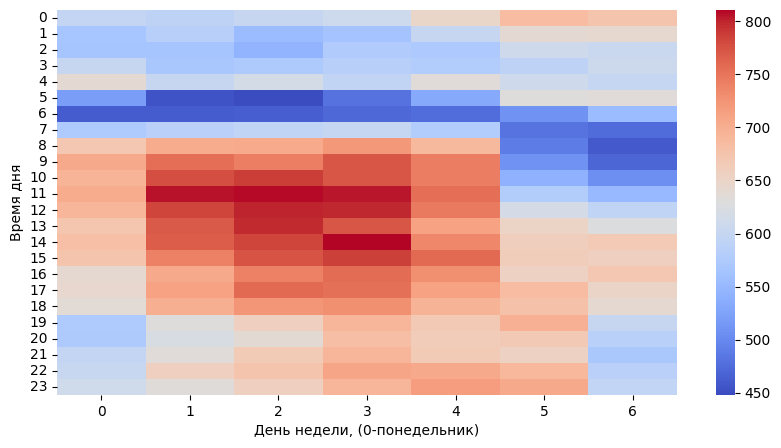

In [25]:
# ваш код здесь

# Строим сводную таблицу длительности поездки по дням недели и времени дня
pivot_data = df.pivot_table(index='pickup_hour', columns='pickup_day_of_week', values='trip_duration', aggfunc='median')

# Создаем тепловую карту.
fig, ax = plt.subplots(figsize=(10, 5))
sns.heatmap(pivot_data, cmap='coolwarm', ax=ax)
ax.set_xlabel('День недели, (0-понедельник)')
ax.set_ylabel('Время дня');

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


Text(0, 0.5, 'Широта завершения поездки')

/home/igor/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/home/igor/anaconda3/envs/tf-gpu/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


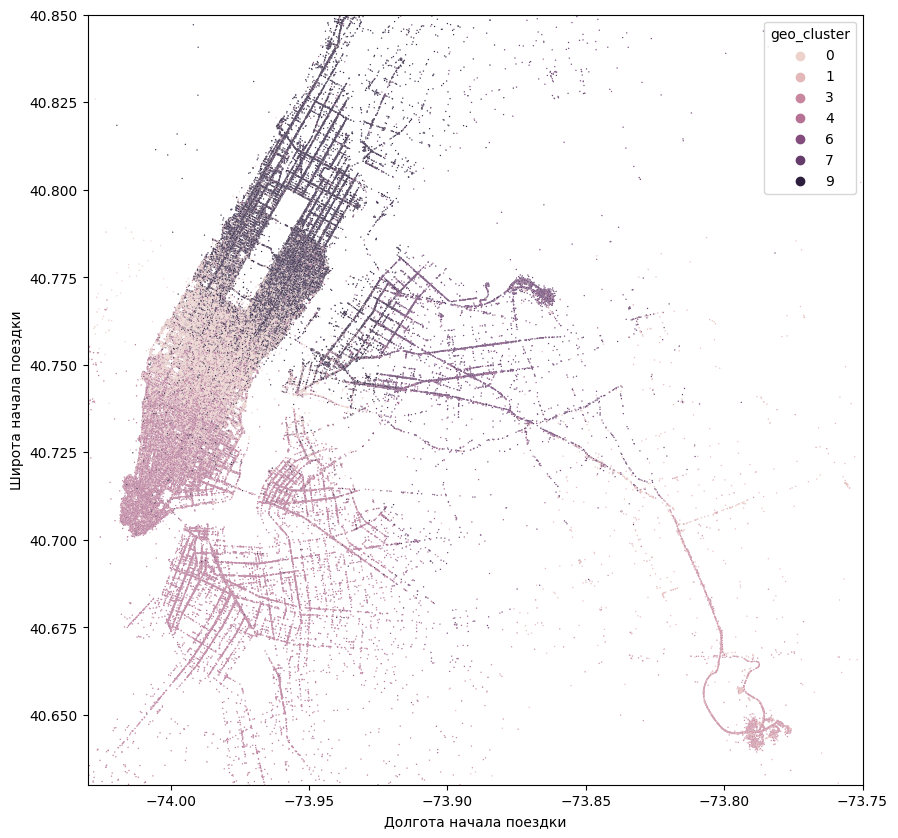

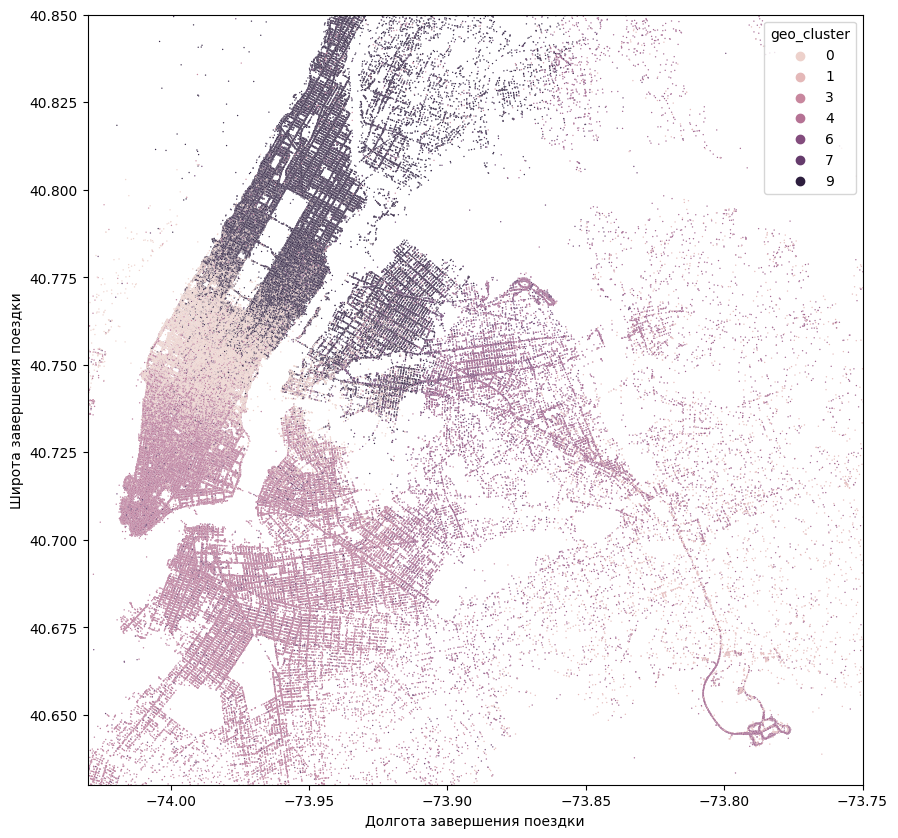

In [26]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ваш код здесь
# Координаты точек начала поездок.
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='pickup_longitude', y='pickup_latitude', data=df, ax=ax, hue='geo_cluster', s=1)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Долгота начала поездки')
ax.set_ylabel('Широта начала поездки')

# Координаты точек завершения поездок.
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(x='dropoff_longitude', y='dropoff_latitude', data=df, ax=ax, hue='geo_cluster', s=1)
ax.set_xlim(city_long_border)
ax.set_ylim(city_lat_border)
ax.set_xlabel('Долгота завершения поездки')
ax.set_ylabel('Широта завершения поездки')

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [27]:
#print('Shape of data: {}'.format(taxi_data.shape))
#print('Columns: {}'.format(taxi_data.columns))


# Убираем признаки, которые далее не понадобятся.
df = df.drop(['time','windchill', 'heat index', 'humidity',
       'pressure', 'dew Point', 'wind dir', 'gust speed',
        'conditions', 'date', 'hour'], axis=1 )

print('Shape of data: {}'.format(df.shape))
print('Columns: {}'.format(df.columns))


Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [28]:
#train_data = taxi_data.copy()
train_data = df.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [29]:
# ваш код здесь
train_data = train_data.drop(['id','dropoff_datetime'], axis=1 )

Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [30]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Shape of data:  (1458233, 23)


### Задание 4.2.
Закодируйте признак vendor_id в таблице train_data таким образом, чтобы он был равен 1, если идентификатор таксопарка равен 0, и 1 в противном случае.

Закодируйте признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение "N", и 0 в противном случае.

а) Рассчитайте среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

б) Рассчитайте среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [31]:
# ваш код здесь

# Кодируем vendor_id
train_data['vendor_id'] = train_data['vendor_id'].map({1: 0, 2: 1})
vendor_id_mean = train_data['vendor_id'].mean()
vendor_id_mean = round(vendor_id_mean, 2)
print(f'Среднее по столбцу "vendor_id": {vendor_id_mean}.')

# Кодируем store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
store_and_fwd_flag_mean = train_data['store_and_fwd_flag'].mean()
store_and_fwd_flag_mean = round(store_and_fwd_flag_mean, 3)
print(f'Среднее по столбцу "store_and_fwd_flag": {store_and_fwd_flag_mean}.')


Среднее по столбцу "vendor_id": 0.53.
Среднее по столбцу "store_and_fwd_flag": 0.006.


### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEndoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [32]:
# ваш код здесь
from sklearn.preprocessing import OneHotEncoder

# Имена столбцов для кодирования.
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# Выполняем one-hot- кодирование.
one_hot_encoder = OneHotEncoder(drop='first')
data_onehot = one_hot_encoder.fit_transform(train_data[columns_to_change]).toarray()

# Читаем имена столбцов.
column_names = one_hot_encoder.get_feature_names_out()

# Преоразуем массив one-hot признаков в датафрейм.
data_onehot = pd.DataFrame(data_onehot, columns=column_names)

# Печатаем количество двоичных столбцов.
print(f'Количество двоичных столбцов: {len(column_names)}.')

Количество двоичных столбцов: 18.


Добавим полученную таблицу с закодированными признаками:

In [33]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [34]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [35]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [36]:
# ваш код здесь

from sklearn.feature_selection import SelectKBest, f_regression

# Выбираем 25 наилучших признаков.
selector = SelectKBest(f_regression, k=25)
selector.fit(X_train, y_train_log)

# Создаем тренировочный и валидационный датафреймы состоящие из выбранных признаков.
cols = selector.get_support(indices=True)
X_train = X_train.iloc[:,cols]
X_valid = X_valid.iloc[:,cols]

best_features = list(X_train.columns)

# Выводим выбранный признаки на печать
print(f'Выбранные признаки: {best_features}.')

Выбранные признаки: ['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude', 'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'pickup_hour', 'pickup_holiday', 'total_distance', 'total_travel_time', 'number_of_steps', 'haversine_distance', 'temperature', 'pickup_day_of_week_1', 'pickup_day_of_week_2', 'pickup_day_of_week_3', 'pickup_day_of_week_4', 'pickup_day_of_week_5', 'pickup_day_of_week_6', 'geo_cluster_1', 'geo_cluster_3', 'geo_cluster_5', 'geo_cluster_7', 'geo_cluster_9'].


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. Помните, что обучение нормализатора производится на обучающей выборке, а трансформация на обучающей и валидационной!

Рассчитайте среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлите до сотых.


In [37]:
# ваш код здесь

from sklearn.preprocessing import MinMaxScaler

# Создаем объект нормировщика.
scaler = MinMaxScaler()

# Тренируем его по тренировочному набору.
scaler.fit(X_train)

# Выполняем нормирование тренировочного и валидационного наборов:
X_train_scaled = scaler.transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

valid_mean = round(X_valid_scaled[:,0].mean(), 2)

print(f'Среднее значение по первой колонке валидационной выборки: {valid_mean}')

Среднее значение по первой колонке валидационной выборки: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [39]:
# ваш код здесь

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Создаем объект линейной регресии.
lr = LinearRegression()

# Тренируем модель на тренировочных данных.
lr.fit(X_train_scaled, y_train_log)

# Выполняем предсказание.
y_train_pred = lr.predict(X_train_scaled)
y_valid_pred = lr.predict(X_valid_scaled)

# Рассчитываем RMSLE для тренировочного набора.
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

# Рассчитываем RMSLE для валидационного набора.
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

print(f'RMSLE для тренировочного набора: {round(rmsle_train, 2)}')
print(f'RMSLE для валидационного набора: {round(rmsle_valid, 2)}')

RMSLE для тренировочного набора: 0.54
RMSLE для валидационного набора: 0.54


### Задание 5.2.
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# ваш код здесь

from sklearn.preprocessing import PolynomialFeatures

# Создаем полиномиальные признаки.
poly = PolynomialFeatures(degree=2, include_bias=False)

# Тренируем их на тренировочных данных.
poly.fit(X_train_scaled)

# Преобразуем тренировочный и валидационный наборы.
X_train_poly = poly.transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

# Создаем объект линейной регресии.
lr = LinearRegression()

# Тренируем модель на тренировочных данных.
lr.fit(X_train_poly, y_train_log)

# Выполняем предсказание.
y_train_pred = lr.predict(X_train_poly)
y_valid_pred = lr.predict(X_valid_poly)

# Рассчитываем RMSLE для тренировочного набора.
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

# Рассчитываем RMSLE для валидационного набора.
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

print(f'RMSLE для тренировочного набора: {round(rmsle_train, 2)}')
print(f'RMSLE для валидационного набора: {round(rmsle_valid, 2)}')

### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# ваш код здесь

from sklearn.linear_model import Ridge

# Создаем полиномиальные признаки.
poly = PolynomialFeatures(degree=2, include_bias=False)

# Тренируем их на тренировочных данных.
poly.fit(X_train_scaled)

# Преобразуем тренировочный и валидационный наборы.
X_train_poly = poly.transform(X_train_scaled)
X_valid_poly = poly.transform(X_valid_scaled)

# Создаем объект линейной регресии.
ridge = Ridge(alpha=1)

# Тренируем модель на тренировочных данных.
ridge.fit(X_train_poly, y_train_log)

# Выполняем предсказание.
y_train_pred = ridge.predict(X_train_poly)
y_valid_pred = ridge.predict(X_valid_poly)

# Рассчитываем RMSLE для тренировочного набора.
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

# Рассчитываем RMSLE для валидационного набора.
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

print(f'RMSLE для тренировочного набора: {round(rmsle_train, 2)}')
print(f'RMSLE для валидационного набора: {round(rmsle_valid, 2)}')

### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [40]:
# ваш код здесь

from sklearn.tree import DecisionTreeRegressor

# Создаем объект дерева решений.
tree = DecisionTreeRegressor(random_state=42)

# Тренируем модель на тренировочных данных.
tree.fit(X_train_scaled, y_train_log)

# Выполняем предсказание.
y_train_pred = tree.predict(X_train_scaled)
y_valid_pred = tree.predict(X_valid_scaled)

# Рассчитываем RMSLE для тренировочного набора.
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

# Рассчитываем RMSLE для валидационного набора.
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

print(f'RMSLE для тренировочного набора: {round(rmsle_train, 2)}')
print(f'RMSLE для валидационного набора: {round(rmsle_valid, 2)}')

RMSLE для тренировочного набора: 0.0
RMSLE для валидационного набора: 0.57


### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


In [41]:
# ваш код здесь

max_depths = range(7, 20)
RMSLE_table = pd.DataFrame(['md', 'RMSLE_train', 'RMSLE_valid'])

for md in max_depths:

    # Создаем объект дерева решений.
    tree = DecisionTreeRegressor(random_state=42, max_depth = md)

    # Тренируем модель на тренировочных данных.
    tree.fit(X_train_scaled, y_train_log)

    # Выполняем предсказание.
    y_train_pred = tree.predict(X_train_scaled)
    y_valid_pred = tree.predict(X_valid_scaled)

    # Рассчитываем RMSLE для тренировочного набора.
    rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

    # Рассчитываем RMSLE для валидационного набора.
    rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))
    

    print(f'Depth: {md} RMSLE для тренировочного набора: {round(rmsle_train, 2)} для валидационного набора: {round(rmsle_valid, 2)}')
    new_row =pd.DataFrame({'md':md, 'RMSLE_train':rmsle_train, 'RMSLE_valid':rmsle_valid}, index=[0])
    RMSLE_table = pd.concat([new_row, RMSLE_table], ignore_index=True)
    


Depth: 7 RMSLE для тренировочного набора: 0.44 для валидационного набора: 0.45
Depth: 8 RMSLE для тренировочного набора: 0.44 для валидационного набора: 0.44
Depth: 9 RMSLE для тренировочного набора: 0.43 для валидационного набора: 0.44
Depth: 10 RMSLE для тренировочного набора: 0.42 для валидационного набора: 0.43
Depth: 11 RMSLE для тренировочного набора: 0.41 для валидационного набора: 0.43
Depth: 12 RMSLE для тренировочного набора: 0.41 для валидационного набора: 0.43
Depth: 13 RMSLE для тренировочного набора: 0.4 для валидационного набора: 0.43
Depth: 14 RMSLE для тренировочного набора: 0.38 для валидационного набора: 0.44
Depth: 15 RMSLE для тренировочного набора: 0.37 для валидационного набора: 0.44
Depth: 16 RMSLE для тренировочного набора: 0.36 для валидационного набора: 0.45
Depth: 17 RMSLE для тренировочного набора: 0.34 для валидационного набора: 0.46
Depth: 18 RMSLE для тренировочного набора: 0.32 для валидационного набора: 0.47
Depth: 19 RMSLE для тренировочного набора: 0

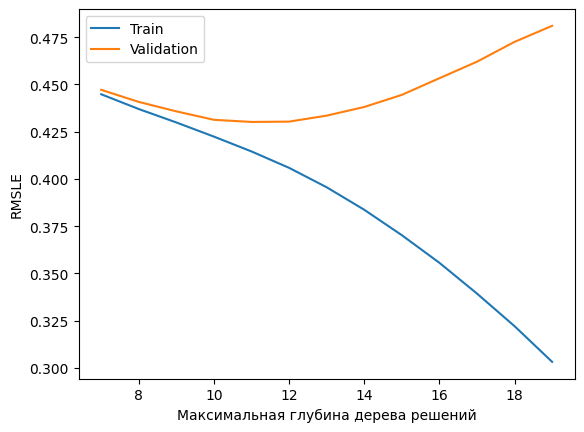

In [42]:
# Строим график RMSLE для тренировочного и тестового набора в зависимости от глубины дерева решений.
plt.plot(RMSLE_table['md'], RMSLE_table['RMSLE_train'], label='Train')
plt.plot(RMSLE_table['md'], RMSLE_table['RMSLE_valid'], label='Validation')
plt.xlabel('Максимальная глубина дерева решений')
plt.ylabel('RMSLE')
plt.legend()
plt.show()

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [43]:
# ваш код здесь

from sklearn.ensemble import RandomForestRegressor

# Создаем объект случайного дерева решений.
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    criterion='squared_error',
    min_samples_split=20,
    random_state=42,
    verbose=True,
    n_jobs=-1
)

# Тренируем модель на тренировочных данных.
rf.fit(X_train_scaled, y_train_log)

# Выполняем предсказание.
y_train_pred = rf.predict(X_train_scaled)
y_valid_pred = rf.predict(X_valid_scaled)

# Рассчитываем RMSLE для тренировочного набора.
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

# Рассчитываем RMSLE для валидационного набора.
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

print(f'RMSLE для тренировочного набора: {round(rmsle_train, 2)}')
print(f'RMSLE для валидационного набора: {round(rmsle_valid, 2)}')

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed: 12.2min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed: 12.7min finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    2.0s
[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    9.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    9.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    1.0s


RMSLE для тренировочного набора: 0.4
RMSLE для валидационного набора: 0.41


[Parallel(n_jobs=4)]: Done 192 tasks      | elapsed:    4.4s
[Parallel(n_jobs=4)]: Done 200 out of 200 | elapsed:    4.5s finished


### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [44]:
# ваш код здесь

from sklearn.ensemble import GradientBoostingRegressor

# Создаем объект градиентного бустинга.
gb = GradientBoostingRegressor(
    learning_rate=0.5,
    n_estimators=100,
    max_depth=6,
    min_samples_split=30,
    random_state=42,
    verbose=True
)

# Тренируем модель на тренировочных данных.
gb.fit(X_train_scaled, y_train_log)

# Выполняем предсказание.
y_train_pred = gb.predict(X_train_scaled)
y_valid_pred = gb.predict(X_valid_scaled)

# Рассчитываем RMSLE для тренировочного набора.
rmsle_train = np.sqrt(mean_squared_error(y_train_log, y_train_pred))

## Рассчитываем RMSLE для валидационного набора.
rmsle_valid = np.sqrt(mean_squared_error(y_valid_log, y_valid_pred))

print(f'RMSLE для тренировочного набора: {round(rmsle_train, 2)}')
print(f'RMSLE для валидационного набора: {round(rmsle_valid, 2)}')

      Iter       Train Loss   Remaining Time 
         1           0.3110           11.75m
         2           0.2247           11.58m
         3           0.1987           11.30m
         4           0.1876           11.25m
         5           0.1823           11.09m
         6           0.1783           11.01m
         7           0.1756           10.88m
         8           0.1730           10.78m
         9           0.1709           10.62m
        10           0.1696           10.47m
        20           0.1577            9.29m
        30           0.1538            8.10m
        40           0.1502            6.93m
        50           0.1480            5.85m
        60           0.1451            4.73m
        70           0.1431            3.55m
        80           0.1410            2.38m
        90           0.1393            1.20m
       100           0.1383            0.00s
RMSLE для тренировочного набора: 0.37
RMSLE для валидационного набора: 0.39


### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


Градиентный бустинг над деревьями решений показал наилучший результат.

### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


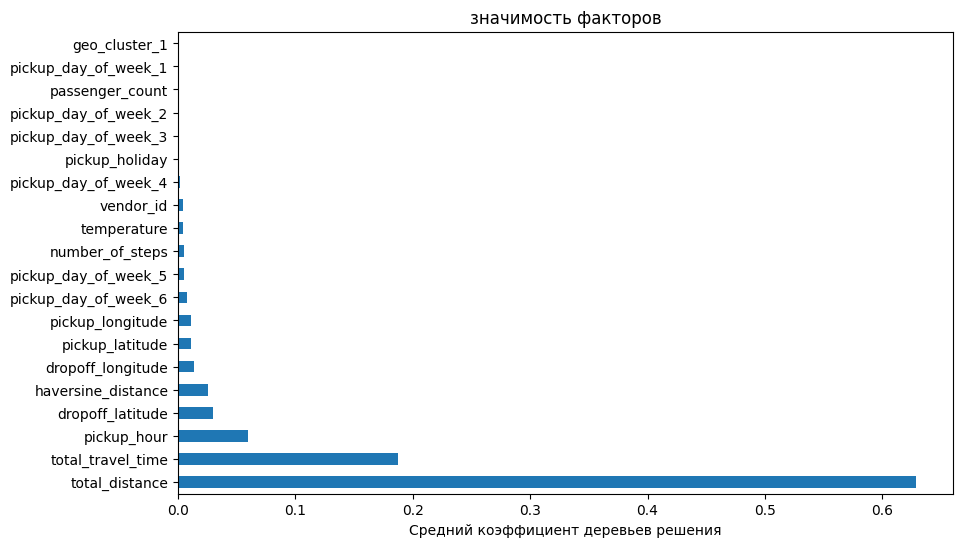

In [45]:
# ваш код здесь

# Make a plot of feature importance
plt.figure(figsize=(10, 6))
feat_importances = pd.Series(gb.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.xlabel('Средний коэффициент деревьев решения')
plt.title('значимость факторов')
plt.show()

### Задание 6.5.
Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [46]:
# ваш код здесь

from sklearn.metrics import median_absolute_error

# Расчитываем медианную абсолютную ошибку (MeAE).
mae_valid = median_absolute_error(np.exp(y_valid_log), np.exp(y_valid_pred))

print(f'MeAE валидационного набора: {round(mae_valid / 60, 1)} минут.')


MeAE валидационного набора: 1.8 минут.


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [47]:
test_data = pd.read_csv("data/Project5_test_data.csv")
osrm_data_test = pd.read_csv("data/Project5_osrm_data_test.csv")
test_id = test_data['id']

In [48]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 9 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   id                  625134 non-null  object 
 1   vendor_id           625134 non-null  int64  
 2   pickup_datetime     625134 non-null  object 
 3   passenger_count     625134 non-null  int64  
 4   pickup_longitude    625134 non-null  float64
 5   pickup_latitude     625134 non-null  float64
 6   dropoff_longitude   625134 non-null  float64
 7   dropoff_latitude    625134 non-null  float64
 8   store_and_fwd_flag  625134 non-null  object 
dtypes: float64(4), int64(2), object(3)
memory usage: 42.9+ MB


In [49]:
osrm_data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 625134 entries, 0 to 625133
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    625134 non-null  object 
 1   starting_street       625134 non-null  object 
 2   end_street            625134 non-null  object 
 3   total_distance        625134 non-null  float64
 4   total_travel_time     625134 non-null  float64
 5   number_of_steps       625134 non-null  int64  
 6   street_for_each_step  625134 non-null  object 
 7   distance_per_step     625134 non-null  object 
 8   travel_time_per_step  625134 non-null  object 
 9   step_maneuvers        625134 non-null  object 
 10  step_direction        625134 non-null  object 
 11  step_location_list    625134 non-null  object 
dtypes: float64(2), int64(1), object(9)
memory usage: 57.2+ MB


Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [50]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
print(test_data.info())
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 625134 entries, 0 to 625133
Data columns (total 24 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   id                    625134 non-null  object        
 1   vendor_id             625134 non-null  int64         
 2   pickup_datetime       625134 non-null  datetime64[ns]
 3   passenger_count       625134 non-null  int64         
 4   pickup_longitude      625134 non-null  float64       
 5   pickup_latitude       625134 non-null  float64       
 6   dropoff_longitude     625134 non-null  float64       
 7   dropoff_latitude      625134 non-null  float64       
 8   store_and_fwd_flag    625134 non-null  object        
 9   pickup_date           625134 non-null  object        
 10  pickup_hour           625134 non-null  int64         
 11  pickup_day_of_week    625134 non-null  int64         
 12  pickup_holiday        625134 non-null  int64         
 13 

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [51]:
# ваш код здесь
y_test_predict = gb.predict(X_test_scaled)
y_test_predict = np.exp(y_test_predict) - 1

submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)